In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from GetData import getSubjects, getData
import numpy as np
from mne_bids import BIDSPath, read_raw_bids
from filter_fmri_elecs import get_fmri_corrMap 
from plotElectrodes import sortCorrMaps
from functions.orderFilterMap import orderFilterMaps

In [2]:
# Change these variables to work for your block
subj = 'sub-22'
sess = 'iemu'
task = 'film' # 'rest'
acq = 'clinical'
run = '1'
data_dir = "/home/jovyan/aws_ds003688"
fmricorr_dir =  f'{data_dir}/derivatives/fmricorr'  
ieegcorr_dir = f'{data_dir}/derivatives/corrMaps'

hg_dir=f'{ieegcorr_dir}/HighGamma/'
car_dir=f'{ieegcorr_dir}/CAR/'
alpha_dir=f'{ieegcorr_dir}/alpha/'
theta_dir=f'{ieegcorr_dir}/theta/'

In [3]:
subj_data=getData(subj, data_dir, sess, task, acq, run)

Opening raw data file /home/jovyan/aws_ds003688/derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.
['T01', 'T09', 'C27', 'C28', 'C06', 'C01', 'C10', 'C03', 'C02', 'C09', 'C17', 'C16', 'C32', 'C24', 'C15', 'C07', 'C08', 'C18', 'C25', 'C26', 'C14', 'T03', 'T11', 'T02', 'T10', 'T05', 'T14', 'T13', 'T04', 'T12', 'C21', 'C29', 'C12', 'C11', 'C19', 'C04', 'C05', 'C13', 'C20', 'T06', 'T07', 'C23', 'C31', 'C22', 'C30']
Opening raw data file /home/jovyan/aws_ds003688/derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.


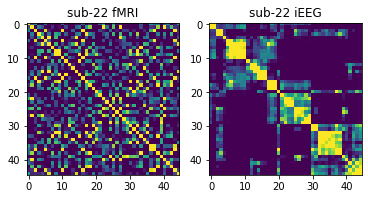

In [33]:
# Load all iEEG data
elecs=subj_data.getHGData().info.ch_names
# for hgfile in os.listdir(hg_dir):
#     if hgfile.startswith(subj) and task in hgfile:
#         hg_dat=np.load(hg_dir+hgfile)
#         chanOrder = sortCorrMaps(subj,hg_dat, 'HighGamma', elecs)
#         [elec, fmri, ieeg] = orderFilterMaps(data_dir, subj.strip('subj-'), sess, task, acq, run, 'HighGamma', chanOrder)
#         fig, axs = plt.subplots(1,2)
#         axs[0].imshow(fmri, clim=(0,0.5))
#         axs[0].set_title(subj + " fMRI")

#         #axs.set_xticklabel(chanOrder)
#         axs[1].imshow(ieeg, clim=(0,0.5))
        #axs[1].set_title(subj + " iEEG")
for carfile in os.listdir(car_dir):
    if carfile.startswith(subj) and task in carfile:
        car_dat=np.load(car_dir+carfile)
        chanOrder = sortCorrMaps(subj,car_dat, 'CAR', elecs)
        print(chanOrder)
        [elec, fmri, ieeg] = orderFilterMaps(data_dir, subj.strip('subj-'), sess, task, acq, run, 'CAR', chanOrder)
        fig, axs = plt.subplots(1,2)
        axs[0].imshow(fmri, clim=(0,0.5))
        axs[0].set_title(subj + " fMRI")

        #axs.set_xticklabel(chanOrder)
        axs[1].imshow(ieeg, clim=(0,0.5))
        axs[1].set_title(subj + " iEEG")
# for alphafile in os.listdir(alpha_dir):
#     if alphafile.startswith(subj) and "rest" in alphafile:
#         alpha_dat=np.load(alpha_dir+alphafile)     
# for thetafile in os.listdir(theta_dir):
#     if thetafile.startswith(subj) and "rest" in thetafile:
#         theta_dat=np.load(theta_dir+thetafile)

['C16', 'C24', 'C10', 'C13', 'C14', 'T03', 'T01', 'T09', 'C06', 'C03', 'T02', 'T10', 'C01', 'C02', 'C26', 'C09', 'C17', 'C18', 'C25', 'C08', 'C07', 'C15', 'T05', 'T07', 'T06', 'T14', 'C05', 'C04', 'C32', 'C11', 'C20', 'C12', 'C19', 'C27', 'C28', 'C21', 'C29', 'C23', 'C22', 'C30', 'C31', 'T04', 'T11', 'T12', 'T13']
Opening raw data file /home/jovyan/aws_ds003688/derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.


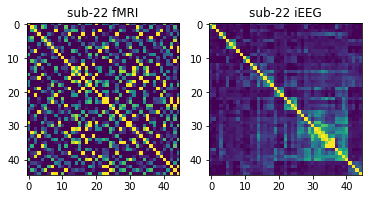

In [32]:
for hgfile in os.listdir(hg_dir):
    if hgfile.startswith(subj) and task in hgfile:
        hg_dat=np.load(hg_dir+hgfile)
        chanOrder = sortCorrMaps(subj,hg_dat, 'HighGamma', elecs)
        print(chanOrder)
        [elec, fmri, ieeg] = orderFilterMaps(data_dir, subj.strip('subj-'), sess, task, acq, run, 'HighGamma', chanOrder)
        fig, axs = plt.subplots(1,2)
        axs[0].imshow(fmri, clim=(0,0.5))
        axs[0].set_title(subj + " fMRI")

        #axs.set_xticklabel(chanOrder)
        axs[1].imshow(ieeg, clim=(0,0.5))
        axs[1].set_title(subj + " iEEG")

In [4]:
elecs=subj_data.getHGData().info.ch_names
for hgfile in os.listdir(hg_dir):
    #print(hgfile)
    if hgfile.startswith(subj) and task in hgfile:
        hg_dat=np.load(hg_dir+hgfile)

Opening raw data file /home/jovyan/aws_ds003688/derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.


In [5]:
chanOrder = sortCorrMaps(subj,hg_dat, , elecs)
print(chanOrder)

['C16', 'C24', 'C10', 'C13', 'C14', 'T03', 'T01', 'T09', 'C06', 'C03', 'T02', 'T10', 'C01', 'C02', 'C26', 'C09', 'C17', 'C18', 'C25', 'C08', 'C07', 'C15', 'T05', 'T07', 'T06', 'T14', 'C05', 'C04', 'C32', 'C11', 'C20', 'C12', 'C19', 'C27', 'C28', 'C21', 'C29', 'C23', 'C22', 'C30', 'C31', 'T04', 'T11', 'T12', 'T13']


In [6]:
[elec, fmri, ieeg] = orderFilterMaps(data_dir, subj.strip('subj-'), sess, task, acq, run, {'HighGamma'}, chanOrder)

Opening raw data file /home/jovyan/aws_ds003688/derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.


Text(0.5, 1.0, 'sub-22 iEEG')

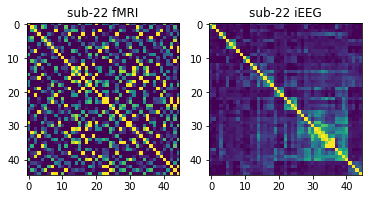

In [22]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fmri, clim=(0,0.5))
axs[0].set_title(subj + " fMRI")

#axs.set_xticklabel(chanOrder)
axs[1].imshow(ieeg, clim=(0,0.5))
axs[1].set_title(subj + " iEEG")

#plt.set_xticklabel(chanOrder)
# axs[1,0].imshow(alpha_dat)
# axs[1,0].set_title(subj + " alpha")
# axs[1,1].imshow(theta_dat)
# axs[1,1].set_title(subj + " theta")
# axs[1,2].imshow(fmri_corrMap)
# axs[1,2].set_title(subj + " fMRI")
# plt.tight_layout()

In [ ]:
# load ieeg corr maps
#hg_dir+bids_path.basename+'_HighGamma_corr.npy'
hg_dat=np.load(hg_dir+bids_path.basename+'_HighGamma_corr.npy')
print(hg_dat.shape)

# car_dat=np.load(car_dir+bids_path.basename+'_CAR_corr.npy')
# print(car_dat.shape)

# alpha_dat=np.load(alpha_dir+bids_path.basename+'_alpha_corr.npy')
# print(alpha_dat.shape)

# theta_dat=np.load(theta_dir+bids_path.basename+'_theta_corr.npy')
# print(theta_dat.shape)


# alpha_dat=np.load(alpha_dir+alphafile)     

# theta_dat=np.load(theta_dir+thetafile)